In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 985 kB 5.2 MB/s 
     |████████████████████████████████| 206 kB 65.5 MB/s 
     |████████████████████████████████| 2.0 MB 44.3 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 3.6 MB 44.3 MB/s 
     |████████████████████████████████| 961 kB 71.2 MB/s 


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://20959.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://20959.gradio.app')

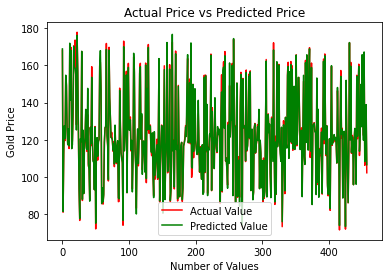

In [ ]:
import gradio as gr

def goldPrice(file_obj):
    gold_data = pd.read_csv(file_obj.name)

    X = gold_data.drop(['Date', 'GLD'], axis = 1)

    Y = gold_data['GLD']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

    regressor = RandomForestRegressor(n_estimators = 100)
    regressor.fit(X_train, Y_train)

    test_data_prediction = regressor.predict(X_test)

    Y_test = list(Y_test)

    plt.plot(Y_test, color='red', label = 'Actual Value')
    plt.plot(test_data_prediction, color='green', label = 'Predicted Value')

    plt.title('Actual Price vs Predicted Price')
    plt.xlabel('Number of Values')
    plt.ylabel('Gold Price')
    plt.legend()

    accuracy = "The accuracy of the model is ", metrics.r2_score(Y_test, test_data_prediction) * 100 , " %"

    return plt.gcf(), accuracy

# goldPrice("/content/drive/MyDrive/CSV/gld_price_data.csv")

iface = gr.Interface(goldPrice, "file", ["plot", "number"], theme="darkhuggingface", title="Gold Price Prediction", allow_flagging=False)
iface.launch()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
